# Introduction to Logistic Regression in Machine Learning

Logistic regression is a fundamental algorithm in machine learning, often used when the outcome we're predicting isn't a continuous number, but rather belongs to a category. Think of it as a way to answer questions that have a **Yes/No**, **0/1**, or similar categorical outcome. For instance, will a customer buy a product (Yes or No)? Will an email be spam (Spam or Not Spam)? These are examples of the kind of problems where logistic regression shines.

In many real-world scenarios, business decisions often come down to a simple **Yes or No**. For example, in a retail setting, we might use a linear regression model to predict how much a customer will pay if they buy something, based on their previous shopping habits. However, a logistic regression model will take this a step further, answering a more fundamental question: **Will this customer make a purchase at all?** This distinction is crucial because understanding if a customer will buy a product, rather than how much they will pay, is often a key first step in making decisions that drive business strategy.

In this tutorial, we will explore the basics of logistic regression, providing a clear understanding of both its practical applications and the mathematical theory behind it. Here's what we’ll cover:

1. **Real-life Use Case Example**: We will go through a concrete example where logistic regression is applied to predict customer behavior, such as whether they will make a purchase or not.
   
2. **Mathematical Theory**: We will break down the underlying math, starting with the sigmoid function and how it relates to the predictions made by logistic regression.

3. **Model Evaluation**: We will discuss how to assess the performance of a logistic regression model using metrics like accuracy, precision, and recall.

4. **Practical Application in Business**: How logistic regression helps in various industries like marketing, finance, healthcare, and more.

By the end of this tutorial, you should have a solid grasp of how logistic regression works and be ready to apply it to real-world problems where decisions come down to a **Yes or No**.



![Logistic regression](https://media.licdn.com/dms/image/D4D12AQG2V8-qHIPtxQ/article-cover_image-shrink_600_2000/0/1677851286779?e=2147483647&v=beta&t=EiecUaHaCwrSyCoUmugLNopdj0ThHlKN4IDrId7u1AA)


# Real-Life Use Case example
In this tutorial, we will start by implementing logistic regression using a simple dataset: **Admittance**.

The dataset contains two columns: the **SAT** score of a student and whether or not they were **admitted** to a university. Our goal is to use logistic regression to predict whether a student will be admitted based on their SAT score.

Let's begin by loading and inspecting the data.


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

data = pd.read_csv('/content/drive/MyDrive/Machine Learning /Enhancements/Admittance.csv')
data.head()


,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


## Data Preprocessing

Before applying logistic regression, we need to preprocess the **Admitted** column. The original values are "Yes" or "No", which are categorical. However, for logistic regression, we need numerical values (0 or 1) to perform the calculations. Therefore, we convert "Yes" to 1 and "No" to 0, which makes the data ready for model training.


In [ ]:
df = data.copy()
df['Admitted'] = df['Admitted'].map({'Yes': 1, 'No': 0})
df

y = df['Admitted']
x1 = df['SAT']

## Data Visualization
Createa a scatter plot to understand the data

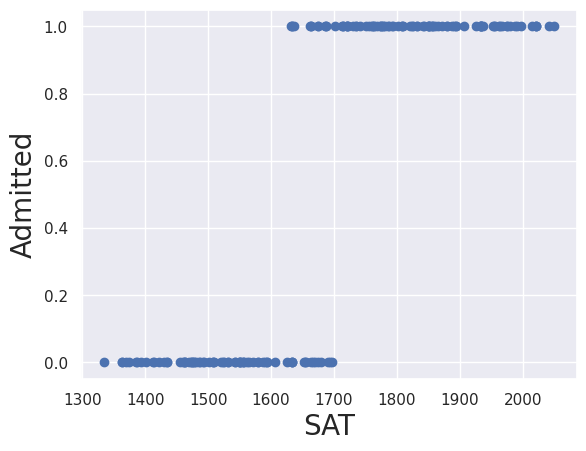

In [ ]:
# Create a scatter plot of x1 (SAT, no constant) and y (Admitted)
plt.scatter(x1,y, color='C0')
# Don't forget to label your axes!
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

# Visualizing the Data: Scatter Plot Interpretation

This scatter plot might look a bit strange, but it's actually common when working with categorical variables. In this plot, we have the **SAT** scores on the x-axis and the **Admitted** status on the y-axis, where "Yes" and "No" are represented as numerical values (1 and 0).

From this, we can easily identify that the points at the bottom (0) represent students who were **not admitted**, while the points at the top (1) represent students who **were admitted**.

Next, let's move on to the next step: we'll try to fit a regression line to this data to visualize and investigate the relationship further.


<ipython-input-5-cb0822f99c71>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat = x1*results_lin.params[1]+results_lin.params[0]


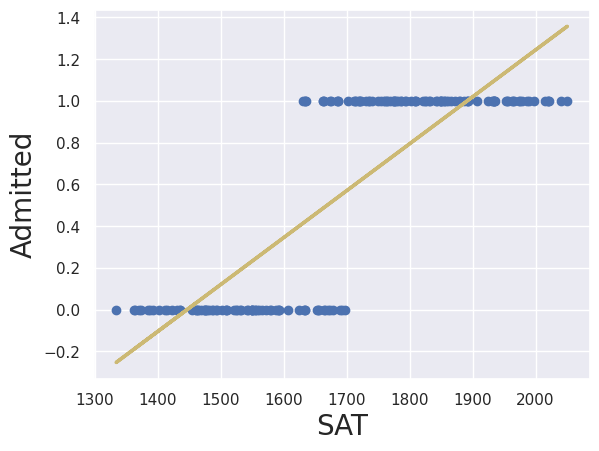

In [ ]:

x = sm.add_constant(x1)
# we call it reg_lin, instead of reg, as we will be dealing with logistic regressions later on
reg_lin = sm.OLS(y,x)
# we segment it into regression and fitted regression (results) as I can use the results as an object for some operations
results_lin = reg_lin.fit()

# Create a scatter plot
plt.scatter(x1,y,color = 'C0')
# Plot the regression line. The coefficients are coming from results_lin.params
y_hat = x1*results_lin.params[1]+results_lin.params[0]
plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

## Linear Regression: A Poor Fit for This Problem

As you can see from the plot, we tried fitting a **linear regression** line to the data, but it clearly doesn't fit well. The line not only doesn't match the data, but it also predicts values that are outside the natural domain of the **Admitted** variable. Specifically, the model predicts values like -0.2 and 1.2, which don't make sense in the context of admission status (since admission can only be 0 or 1).

This highlights the problem with using linear regression here: the model doesn't account for the fact that the **Admitted** column is categorical. It doesn't "know" that the values are restricted to 0 and 1, and it attempts to predict numbers that fall outside of that range.

Is linear regression a "bad" method? Not really. Linear regression is a powerful technique in many contexts. However, it’s crucial to know when and where to apply it. One of the key assumptions for linear regression is **linearity**, which is clearly violated in this case because the relationship between SAT scores and admission is not linear.

This is where **logistic regression** comes in, offering a much better solution for classification problems like this one.


## What Does an Appropriate Model Look Like?




Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<ipython-input-6-f7f618cffa9c>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))


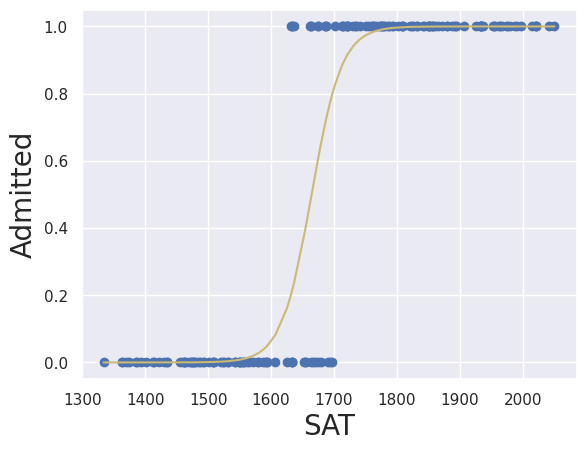

In [ ]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

In the plot above, we see the results of fitting **logistic regression** to our data. Unlike linear regression, logistic regression produces a curve that is bounded between 0 and 1, making it ideal for classification problems like ours. This curve represents the probability of admission given the SAT score.

Interpretation of this curve is as follows:
- When the SAT score is **relatively high**, the probability of admission is very high, which is shown by the points near the top of the graph (close to 1).
- When the SAT score is **too low**, the probability of admission is close to 0, indicating that these students are unlikely to be admitted (as seen at the bottom of the graph).

For SAT scores between **1600 and 1750**, there is **uncertainty** in the model’s predictions, and the probability of admission varies. For example, at an SAT score of **1700**, the probability of admission is approximately **80%**.

This is **logistic regression** in action! It's perfect for problems where we need to predict a probability of something happening, like admission to a university.

Now that we've seen how useful logistic regression is, let's take a deeper look at how it works behind the scenes.

# Logistic Regression Theory: The Basics

### What is a Logistic Model?

A **logistic regression** model is used to predict the **probability** of an event occurring. In our example, given a student's SAT score, we predict the probability that they will be admitted to a university. The key here is that **logistic regression** doesn’t give us a specific numeric outcome, but rather the probability of an outcome happening, which is always between **0** and **1**.

### Why is it called "Logistic"?

The model is called "logistic" because it uses a **logistic function** to predict the probability. The **logistic function** is an S-shaped curve (also known as a sigmoid curve) that is bounded between **0** and **1**. This means that it’s perfect for classification problems where the outcome is categorical (like Yes/No or 1/0).

### Logistic Function vs Linear Regression

Here are the formulas for both **linear regression** and **logistic regression**:

**Linear Regression:**
$$
Y = \beta_0 + \beta_1X_1 + \dots + \beta_kX_k + \epsilon
$$
This is used when the outcome variable \( Y \) is continuous.

**Logistic Regression:**
$$
p(X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \dots + \beta_kX_k)}}
$$
Where \( p(X) \) is the predicted probability that the event occurs (like getting admitted).


### From Logistic to Logit Model

Now, the logistic regression model can be transformed into the **logit model**, which is simpler for interpretation. The logit model is derived by taking the **log of the odds** (i.e., the probability of the event happening divided by the probability of the event not happening). This turns the logistic function into a linear equation:

$$
\text{logit}(p(X)) = \log\left(\frac{p(X)}{1 - p(X)}\right) = \beta_0 + \beta_1X_1 + \dots + \beta_kX_k
$$
This makes the problem linear again, and it’s easier to work with mathematically.

### Understanding Odds

**Odds** represent the ratio of the probability that an event will occur to the probability that it will not occur. Let’s break this down with an example:

- **Coin flip**: There’s a 50% chance of getting heads, so the odds are 1:1 (1 for heads, 1 for tails).
- **Fair dice**: The probability of rolling a 4 is
$$ \frac{1}{6} $$, and the probability of **not** rolling a 4 is
$$ \frac{5}{6} $$.

In the context of logistic regression, the odds tell us how much more likely an event is to occur compared to not occurring. For example, if the odds are 3:1, the event is three times more likely to occur than not.




Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<ipython-input-7-40cac2242c84>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))


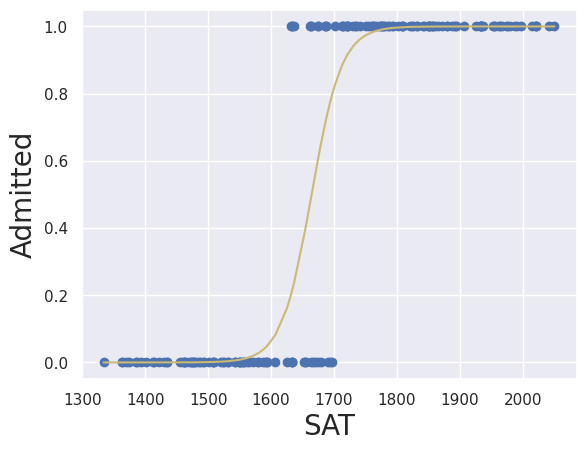

In [ ]:
reg_log = sm.Logit(y,x)
# Fitting the regression
results_log = reg_log.fit()

# Creating a logit function, depending on the input and coefficients
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

# Sorting the y and x, so we can plot the curve
f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
# Plotting the curve
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

### What's Next?

Now that we have a solid understanding of how logistic regression works, let’s tackle the next challenge: **interpreting the StatsModels summary table**. This table includes valuable information about the model's performance, statistical significance, and other important metrics. We'll focus on understanding how to read this table and how the **coefficients**, along with other key statistics, help us interpret the relationship between independent variables (like SAT scores) and the likelihood of admission.


In [ ]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 30 Jan 2025   Pseudo R-squ.:                  0.7992
Time:                        14:20:55   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## **Interpreting the Logit Regression Results**

### Method: Maximum Likelihood Estimation (MLE)

The model we are using is built with **Maximum Likelihood Estimation (MLE)**. In simple terms, the **likelihood function** tells us how likely the observed data is, given a particular set of model parameters. MLE attempts to find the values for the parameters (like coefficients) that make the observed data as likely as possible. It works by trying different parameter values, calculating the likelihood for each, and selecting the model that maximizes this likelihood. When no further improvements can be made, the optimization process stops. This iterative process is at the core of machine learning model fitting.

### Log-Likelihood

The **log-likelihood** is used instead of the likelihood function because it is more computationally convenient (it simplifies calculations). It’s almost always negative, but this is just a result of the math, and doesn't mean anything bad. The reason it's negative is due to the mathematical properties of the likelihood function. When interpreting log-likelihood, **the bigger the number, the better the model**—a less negative value indicates a better fit to the data. For example, a log-likelihood of -115 is better than -120.

### LL-NULL and LLR

**LL-NULL** represents the log-likelihood of a model with no independent variables (a baseline model). It's used as a benchmark to see how much our model improves over simply guessing. The **LLR (Log-Likelihood Ratio)** compares our model to this null model. The value of **5.805e-42** for the LLR which is extremely small, means our logistic regression model, which includes the SAT score as an independent variable, provides a much better fit to the data than just guessing addmittance(which is essentially what the null model does).


### Pseudo R-Squared

The **Pseudo R-squared** value of 0.7992 tells us how well our model fits the data. Unlike linear regression, which has a regular R-squared value, the Pseudo R-squared here gives a rough measure of model fit. The closer this value is to 1, the better the model explains the variance in the data. In this case, a value of 0.7992 suggests that our model does a pretty good job of explaining the variation in admissions based on SAT scores.


## **Coefficients Interpretation**

In [ ]:
coefficients = results_log.params
coef_table = pd.DataFrame({'Coefficient': coefficients})

# Display the table
coef_table

,Coefficient
const,-69.912802
SAT,0.042005


### Interpreting the Coefficients: A Step-by-Step Guide

We’re going to dive a little bit into the math now, but don't worry! We'll keep it simple and easy to understand.

At the heart of logistic regression is the **logit model**, which involves odds. The equation for our model looks like this:

$$
\text{log}(odds) = -69.91 + 0.042 \times \text{SAT}
$$

This equation shows the relationship between the odds of admission and the SAT score.

### Interpreting the Coefficients

Now let’s take two different SAT scores, **SAT1** and **SAT2**, and plug them into our equation. This gives us two log(odds) values:

$$
\text{log}(odds_2) = -69.91 + 0.042 \times \text{SAT}_2
$$
$$
\text{log}(odds_1) = -69.91 + 0.042 \times \text{SAT}_1
$$

Next, let’s look at the **difference** between the two log(odds) values:

$$
\text{log}(odds_2) - \text{log}(odds_1) = 0.042 \times (\text{SAT}_2 - \text{SAT}_1)
$$

Now, let's assume that the **difference between SAT2 and SAT1** is **1 unit** (meaning SAT2 is 1 point higher than SAT1). After simplifying the equation, we get:

$$
\frac{odds_2}{odds_1} = 1.042
$$

This means that for every 1-point increase in the SAT score, the **odds of being admitted** increase by a factor of **1.042**. In other words, as the SAT score goes up by 1 point, the odds of admission increase by about **4.2%**.

### Scaling the SAT Score Difference

Now, let’s see how the odds change when the difference in SAT scores is larger.

1. **For a 10-point increase in SAT score**: The formula tells us that the odds increase by a factor of
$$ 1.042^{10} $$. So, a 10-point increase in SAT score would multiply the odds by approximately **1.48** (or a **48% increase** in the odds of admission).

2. **For a 100-point increase in SAT score**: Similarly, with a 100-point increase, the odds would increase by a factor of
$$ 1.042^{100} $$, which is roughly
$$ 1.48^{10} = 5.76 $$.
This means a 100-point increase in SAT score would multiply the odds by about **5.76**, or a **476% increase** in the odds of being admitted.


### Conclusion

So, in simple terms, the coefficient of **0.042** means that with each additional point on the SAT, the odds of being admitted increase by approximately **4.2%**. The larger the difference in SAT scores, the greater the impact on the odds of being admitted.
